#<a name='7'></a>
<div dir='rtl'>
<h1>7. مدل بیزی با دیگر توزیع‌ها</h1>
</div>

<div dir='rtl'>
پیشتر پیاده‌سازی مدل‌های بیزی مبتنی بر توزیع برنولی را مشاهده کردید. اما گفته شد به هر مدلی که تصمیم‌گیری را بر مبنای قاعده‌ی بیز انجام دهد، مدل بیزی گفته می‌شود. در این بخش یک مدل بیزی را بررسی خواهیم کرد که از توزیع‌های پواسون و نمایی استفاده می‌کند.
</div>

<div dir='rtl'>
مثال) فرض کنید قصد داریم وقوع حمله‌ی سایبری به یک سایت را در هر ساعت، بر مبنای دو ویژگی تعداد درخواست‌های ارسالی به سایت و تعداد خرید‌های انجام شده از سایت پیشگویی کنیم. با بررسی‌های انجام شده، مشخص شده که دو متغیر پیشگو مطرح (تعداد درخواست‌ها و تعداد خرید‌ها) به شرط متغیر پاسخ (وقوع حمله) از هم مستقل بوده و به ترتیب، از توزیع‌های پواسون و نمایی پیروی می‌کنند به نحوی که اگر متغیرهای تصادفی
$X_1$ و $X_0$
را به ترتیب مربوط به تعداد درخواست‌ها در ساعتی که حمله رخ داده یا نداده و متغیر‌های تصادفی
$Y_1$ و $Y_0$
را به ترتیب مربوط به تعداد خرید‌ها در ساعتی که حمله رخ داده یا نداده در نظر بگیریم، داریم:
$$
X_0 \sim Poi(100) , X_1 \sim Poi(300)
$$
$$
Y_0 \sim Exp(0.1) , Y_1 \sim Exp(0.25)
$$
همچنین احتمال رخداد حمله برابر
$0.1$
درنظر گرفته شده است.
</div>

<div dir='rtl'>
برای پاسخگویی به مسئله‌ی مطرح شده، ابتدا نیاز داریم برای هر یک از چهار متغیر تصادفی داده شده، تابعی داشته باشیم که با دریافت مقدار، احتمال مشاهده‌ی آن مقدار را خروجی دهد تا بتوانیم از این احتمال در رابطه‌ی بیز استفاده کنیم. توابع
`dpois`
و
`dexp`
که توابع پیشفرض زبان
R
هستند به سادگی این خواسته را برآورده می‌کنند:
</div>

In [ ]:
# `dpois(x, lambda)` returns probability of getting `x` as output of a poisson
# distribution with parameter `lambda`.
dpois(1, 3)
dpois(2, 3)

[1] 0.1493612

[1] 0.2240418

In [ ]:
# `dexp(x, rate)` returns probability of getting `x` as output of a exponential
# distribution with parameter `rate`.
dexp(1, 3)
dexp(2, 3)

[1] 0.1493612

[1] 0.007436257

<div dir='rtl'>
حال برای هر یک از پیش‌آمد‌های ممکن برای متغیر پاسخ (وقوع حمله) یک تابع تعریف خواهیم کرد که با دریافت مقادیر متغیر‌های پیشگو (تعداد درخواست‌ها و تعداد خرید‌ها) امتیاز آن پیش‌آمد را برگرداند. منظور از امتیاز، خروجی رابطه‌ی بیز بدون درنظر گرفتن مخرج کسر است (دلیل صرف‌نظر از مخرج کسر در بخش دوم توضیح داده شد).
اگر این امتیاز را با
$B$
نشان دهیم:
$$
B_{True}(x,y) = 0.1 P_{X_1}(x) P_{Y_1}(y)
$$
$$
B_{False}(x,y) = 0.9 P_{X_0}(x) P_{Y_0}(y)
$$
<li>
درستی روابط بالا را نشان دهید.
</li>
</div>

In [ ]:
Btrue <- function(x, y) {
  return (
    0.1 * dpois(x, 300) * dexp(y, 25)
  )
}

Bfalse <- function(x, y) {
  return (
    0.9 * dpois(x, 100) * dexp(y, 0.1)
  )
}

Btrue(100, 1)
Bfalse(100, 1)

[1] 9.870865e-52

[1] 0.003246095

<div dir='rtl'>
حال با یک مقایسه‌ی ساده بر روی خروجی توابع بالا، می‌توانیم به ازای هر ورودی، پیشگویی را انجام دهیم:
</div>

In [ ]:
predict_attack <- function(x, y) {
  return (Btrue(x, y) > Bfalse(x, y))
}

predict_attack(100, 1)
predict_attack(1000, 1)

[1] FALSE

[1] TRUE

<div dir='rtl'>
<li>
سعی کنید منطق این پیشگویی را با زبان عامیانه توضیح دهید.
</li>
<li>
مسائل دیگری با استفاده از توزیع‌های دیگر مطرح کرده و پیشگوی آن‌ها را پیاده‌سازی کنید. با جستجو در اینترنت، می‌توانید توابع مشابه برای دیگر توزیع‌ها را پیدا کنید.
</li>
<li>
برای یک پیشگویی قوی (که صدق بیشتری در پیشگویی داشته باشد) به کمک مدل‌های بیزی، بهتر است مشابه آنچه در بالا انجام شد، برای هر متغیر پیشگو از توزیع مناسب آن استفاده شود. این عمل کار ساده‌ای نیست. هرچند روش‌هایی برای محاسبه‌ی پارامتر‌های توزیع‌ها با نگاه به نمونه‌ها وجود دارد، راهی برای پی بردن به نوع واقعی توزیع مربوط به یک متغیر وجود نداشته و نیازمند دانش جانبی نسبت به مسئله است. در آینده با روش‌های تخمین پارامتر توزیع‌ها آشنا خواهید شد. در آن بخش، به آموزش مدل‌های بیزی با استفاده از دادگان آموزشی خواهیم پرداخت که هدف پیدا کردن توزیع‌های مناسب‌تر برای استفاده در مدل بیزی است.
</li>
</div>

<div dir='rtl'>
<font color='green'>
<h3><font color='green'>اگر مشتاق مشاهده بیشتر هستید، ادامه دهید:</font></h3>
قصد داریم نحوه طبقه‌بندی مدل‌های بیزی را به صورت بصری مشاهده کنیم.
کد‌های این قصمت توضیح داده نخواهند شد.
</font>
</div>

In [ ]:
df = data.frame(row.names = seq(1, 100 * 30))
df['x'] = rep(seq(100), 30) * 10
df['y'] = rep(seq(30), each = 100)
df['prediction'] = apply(df, 1, function(row) {
    return (predict_attack(row['x'], row['y']))
  })
head(df)

,x,y,prediction
,<dbl>,<int>,<lgl>
1,10,1,FALSE
2,20,1,FALSE
3,30,1,FALSE
4,40,1,FALSE
5,50,1,FALSE
6,60,1,FALSE


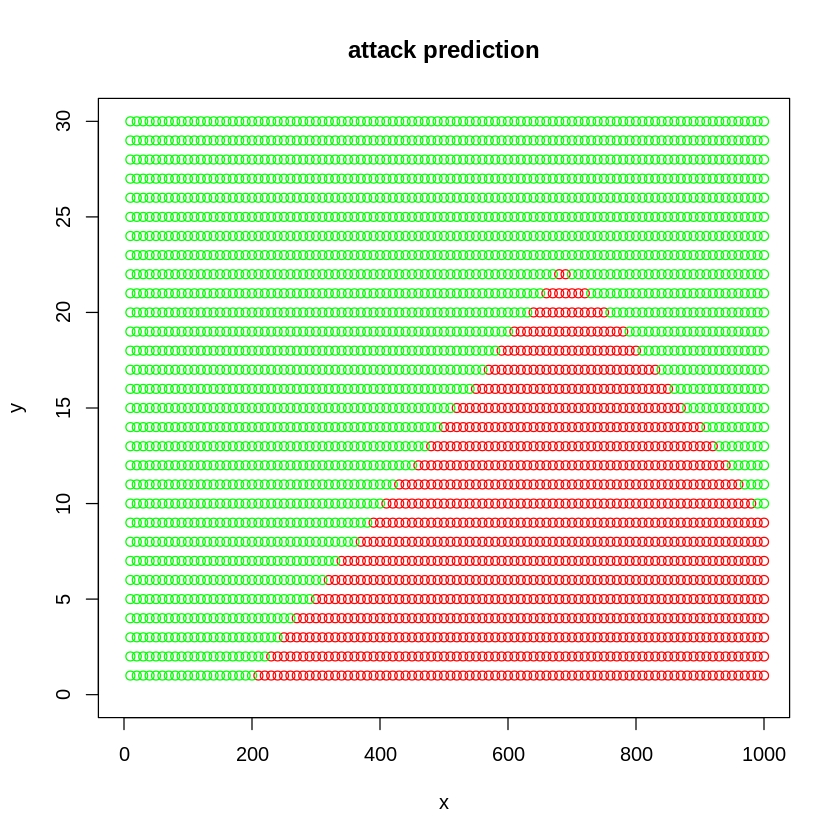

In [ ]:
plot(df[df$prediction, ]$x, df[df$prediction, ]$y, xlab = "x", ylab = "y",
  xlim = c(0, 1000), ylim = c(0, 30), main = "attack prediction", col = 'red')
points(df[!df$prediction, ]$x, df[!df$prediction, ]$y, col = 'green')

<div dir='rtl'>
<font color='green'>
رنگ قرمز به معنی پیشگویی وقوع حمله و رنگ سبز به معنی پیشگویی عدم وقوع حمله است.
</font>
</div>